# **Book Recommender Engine - What Should You Read Next?**

<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px"><span style="font-size:20px; color:#960; font-weight:bold">1. Importing Datasets</span></div>

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import collections
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Reading data
# use sep='\s*,\s*' so that you will take care of spaces in column-names --> there is a space in num_pages column-names
df = pd.read_csv('../input/goodreadsbooks/books.csv', sep=r'\s*,\s*', error_bad_lines = False) # Loading data
df.head() # Displaying the first 5 lines of the dataset

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 3350: Expected 12 fields in line 3350, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4704: Expected 12 fields in line 4704, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5879: Expected 12 fields in line 5879, saw 13. Error could possibly be due to quotes being ignored when a mu

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


<span style="font-size:16px;">b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'</span>

<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px"><span style="font-size:20px; color:#960; font-weight:bold">2. Data Description</span></div>

In [17]:
# Let's look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 11123 records and 12 columns.


In [18]:
# Get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [19]:
# Data type of each columns
print(df.dtypes)

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object


<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px"><span style="font-size:20px; color:#960; font-weight:bold">3. Data Wrangling</span></div>

In [20]:
# Check the number of missing values in each column
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

> <span style="font-size:16px;">The data has no missing values, so no further transformations are required.</span>

In [21]:
# Check duplicate values
df.duplicated().sum()

0

> <span style="font-size:16px;">The data has no duplicate values, so no further transformations are required.</span>

<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px"><span style="font-size:20px; color:#960; font-weight:bold">4. Exploratory Data Analysis (EDA)</span></div>

In [22]:
# Display summary statistical
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<span style="font-size:16px;">From the above results, we can see that our our ratings all lie between 0 and 5. We get know more about the other columns as well, such as the mean of average ratings and some other information that might help us in the future steps. We also checked the data types of each column and also saw that there are no null values present in our data.</span>

In [23]:
# Top 10 Highest Rated Books
top_books = df[df['ratings_count'] > 1000000]
top_books.sort_values(by='average_rating', ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


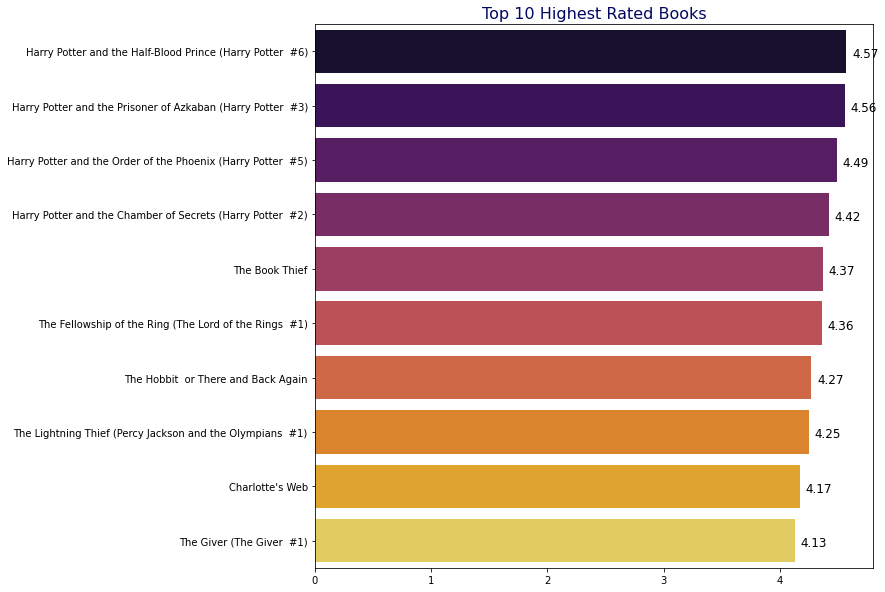

In [24]:
# Visualize Top 10 Highest Rated Books
plt.figure(figsize=(10, 10))
top_books = top_books.sort_values(by='average_rating', ascending=False).head(10)
ax = sns.barplot(x="average_rating", y="title", data=top_books, palette='inferno')
ax.set_title("Top 10 Highest Rated Books", fontsize=16, color='#030764')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

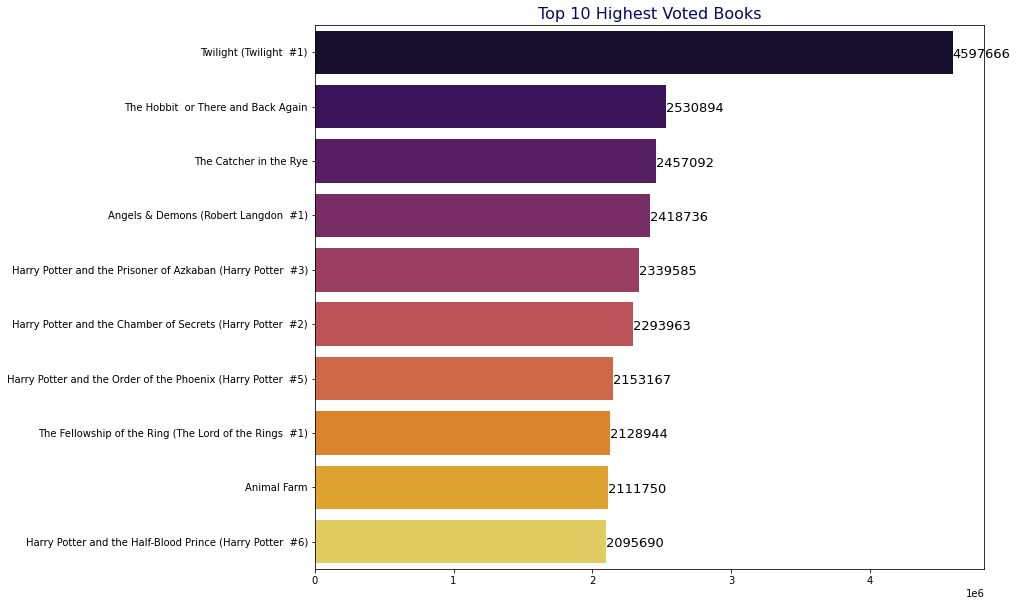

In [25]:
# Top 10 Highest Voted Books
top_reviewed = df.sort_values(by='ratings_count', ascending=False).head(10)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x="ratings_count", y="title", data=top_reviewed, palette='inferno')
ax.set_title("Top 10 Highest Voted Books", fontsize=16, color='#030764')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().astype('int')), fontsize = 13, color = 'k')
ax.grid(False)
plt.show()

In [26]:
# The Most Popular Authors (matrix  use = total_books * mean of average_rating)
popular_authors = df.groupby('authors').agg({'average_rating':'mean', 'title': 'count'}).rename({'title': 'total_books'}, axis = 1)
popular_authors['total_rating'] =  popular_authors['total_books'] * popular_authors['average_rating']
popular_authors.sort_values(['total_rating'], ascending = (False)).head(10)

,average_rating,total_books,total_rating
authors,,,
P.G. Wodehouse,4.147250,40,165.89
Rumiko Takahashi,4.186667,39,163.28
Stephen King,3.973500,40,158.94
Orson Scott Card,3.779143,35,132.27
Agatha Christie,3.989091,33,131.64
Mercedes Lackey,4.039310,29,117.14
Piers Anthony,3.716667,30,111.50
Dick Francis,3.962143,28,110.94
Sandra Brown,3.742069,29,108.52


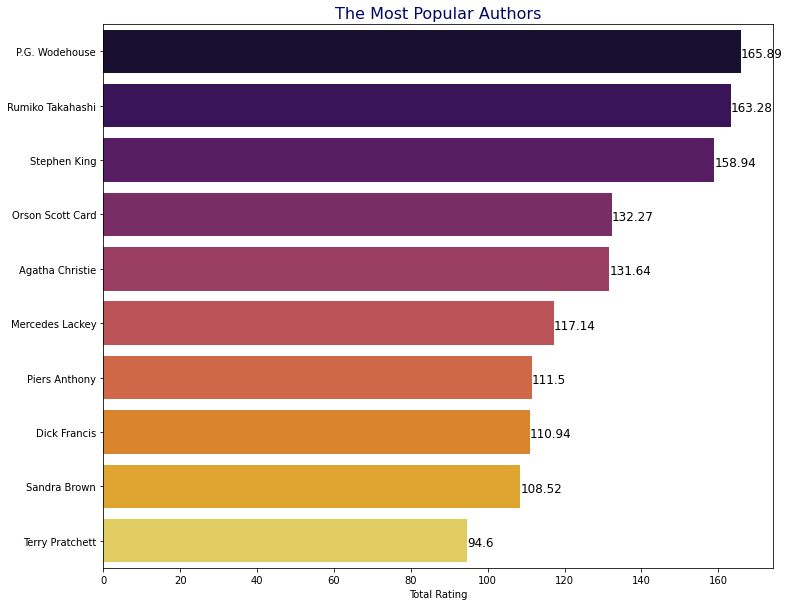

In [27]:
# Visualize The Most Popular Authors (matrix  use = total_books * mean of average_rating)
popular_authors = popular_authors.sort_values(['total_rating'], ascending = (False)).head(10).reset_index()

plt.figure(figsize=(12, 10))
ax = sns.barplot(x="total_rating", y="authors", data=popular_authors, palette='inferno')
ax.set_title("The Most Popular Authors", fontsize=16, color='#030764')
ax.set(xlabel='Total Rating', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().round(2)), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

In [28]:
# Top 10 Highest Rated Authors - mean of average_rating above 4.4 (matrix  use = total_books * mean of average_rating)
highly_rated_authors = df.groupby('authors').agg({'average_rating':'mean', 'title': 'count'}).rename({'title': 'total_books'}, axis = 1)
highly_rated_authors = highly_rated_authors[highly_rated_authors['average_rating']>4.4]
highly_rated_authors['total_rating'] = highly_rated_authors['total_books'] * highly_rated_authors['average_rating']
highly_rated_authors.sort_values(['total_rating'], ascending = (False)).head(10)

,average_rating,total_books,total_rating
authors,,,
Hiromu Arakawa/Akira Watanabe,4.565833,12,54.79
J.K. Rowling,4.513636,11,49.65
Hiromu Arakawa/荒川弘/方郁仁,4.556250,8,36.45
Bill Watterson,4.708571,7,32.96
J.K. Rowling/Mary GrandPré,4.548333,6,27.29
Hiromu Arakawa,4.548000,5,22.74
Karen Kingsbury/Gary Smalley,4.444000,5,22.22
Warren Ellis/Darick Robertson/Rodney Ramos,4.457500,4,17.83
Chie Shinohara,4.445000,4,17.78


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37057 (\N{CJK UNIFIED IDEOGRAPH-90C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda

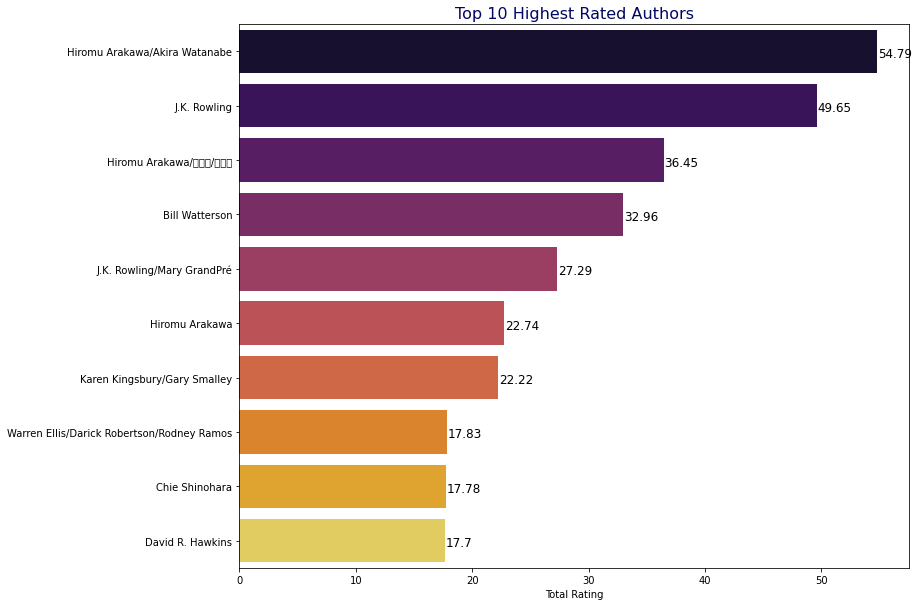

In [29]:
# Visualize Top 10 Highest Rated Authors
highly_rated_authors = highly_rated_authors.sort_values(['total_rating'], ascending = (False)).head(10).reset_index()

plt.figure(figsize=(12, 10))
ax = sns.barplot(x="total_rating", y="authors", data=highly_rated_authors, palette='inferno')
ax.set_title("Top 10 Highest Rated Authors", fontsize=16, color='#030764')
ax.set(xlabel='Total Rating', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().round(2)), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


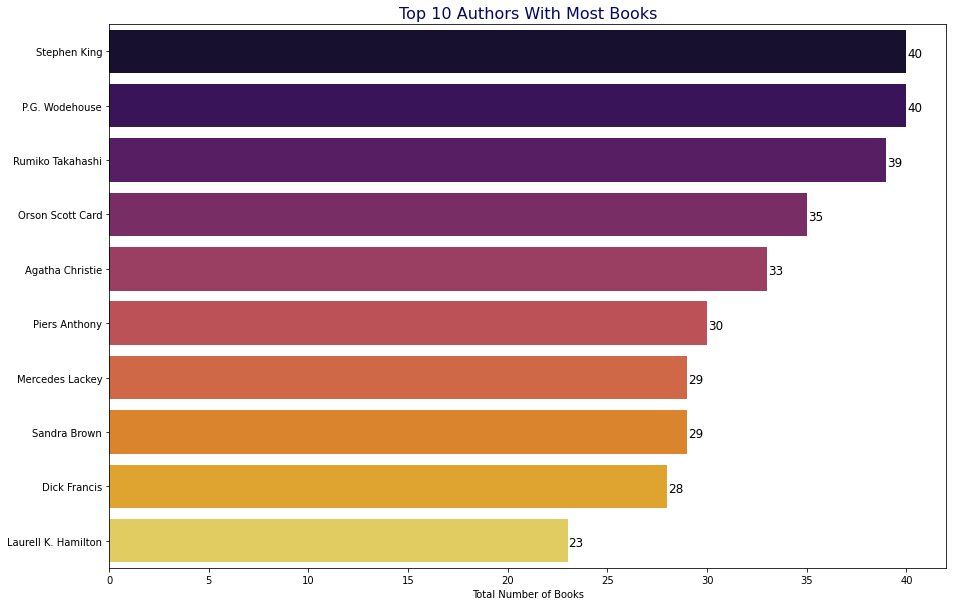

In [30]:
# Top 10 Authors With Most Books
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 10 Authors With Most Books", fontsize=16, color='#030764')
ax.set(xlabel='Total Number of Books', ylabel=None)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

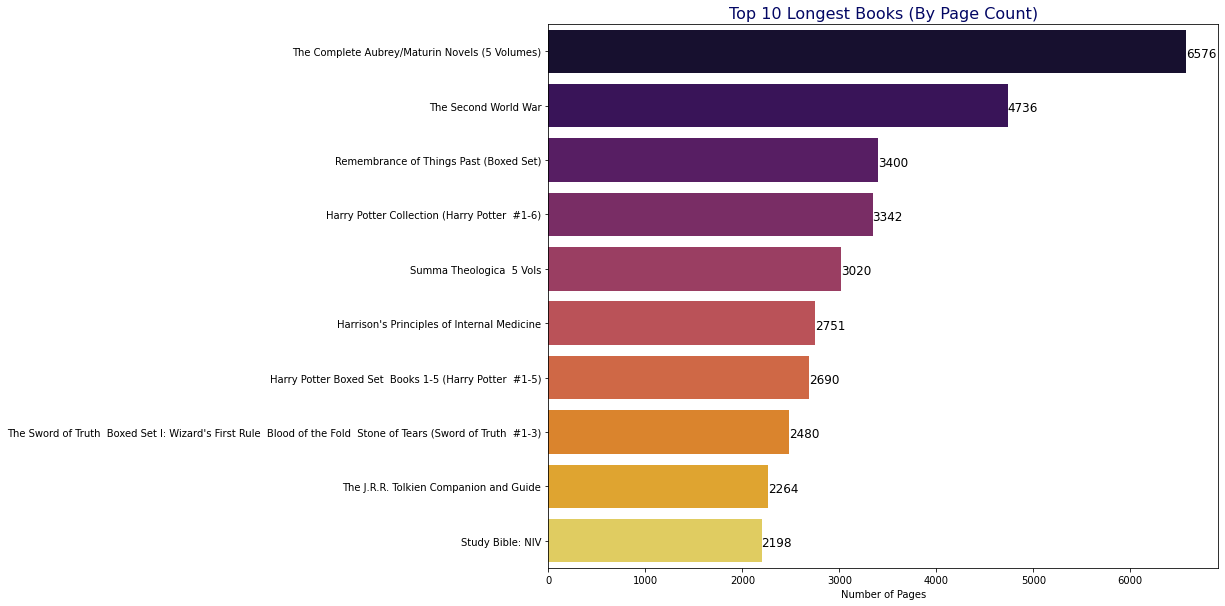

In [31]:
# Top 10 Longest Books (By Page Count)
plt.figure(figsize=(12, 10))
longest_books = df.sort_values(by='num_pages', ascending=False).head(10)
ax = sns.barplot(x="num_pages", y="title", data=longest_books, palette='inferno')
ax.set_title("Top 10 Longest Books (By Page Count)", fontsize=16, color='#030764')
ax.set(xlabel='Number of Pages', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

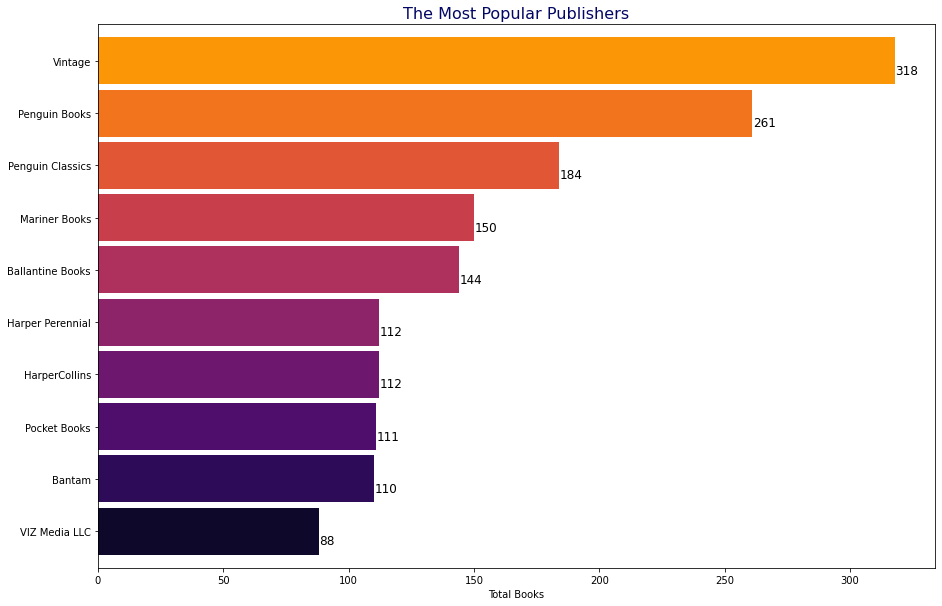

In [32]:
# The Most Popular Publishers
top_publishers = df.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_title("The Most Popular Publishers", fontsize=16, color='#030764')
ax.set(xlabel='Total Books', ylabel=None)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=12, color='black')
plt.show()

[Text(0.5, 0, 'Language'), Text(0, 0.5, '')]

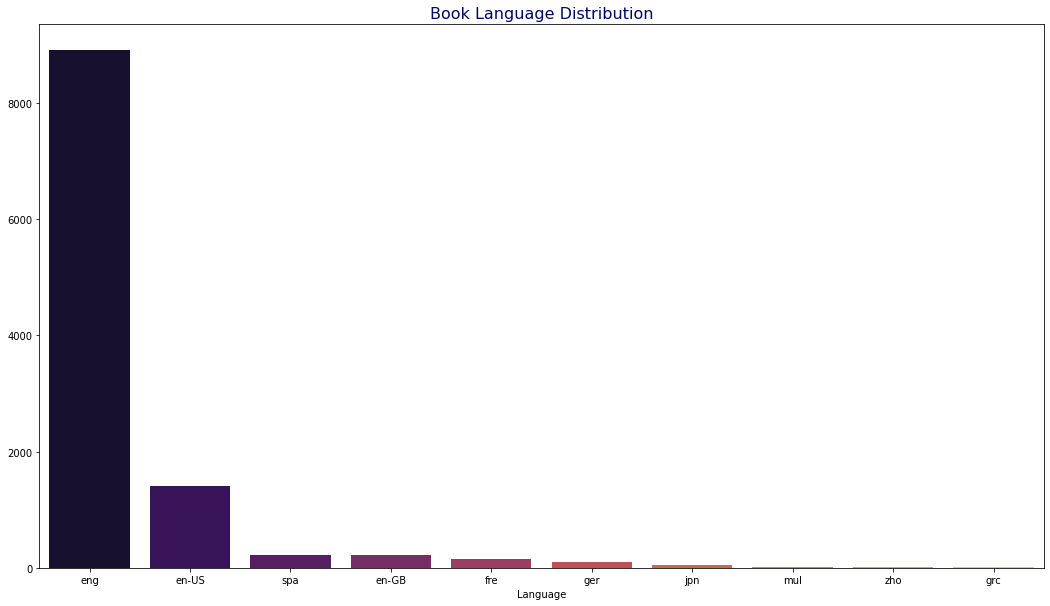

In [33]:
# Book Language Distribution
plt.figure(1, figsize=(18,10))
ax = sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df,palette='inferno')
ax.set_title("Book Language Distribution", fontsize=16, color='#030764')
ax.set(xlabel='Language', ylabel=None)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average Rating')

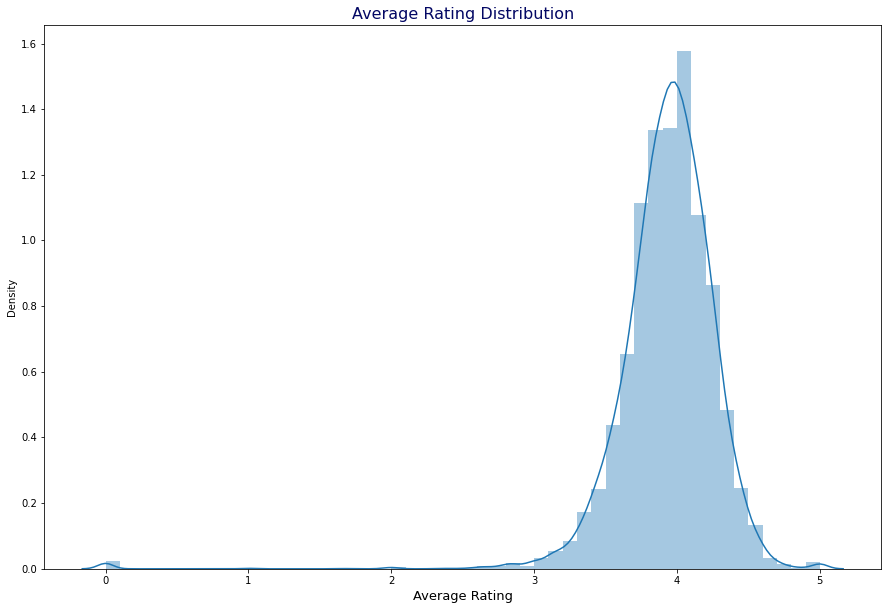

In [34]:
# Average Rating Distribution
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title("Average Rating Distribution", fontsize=16, color='#030764')
ax.set_xlabel('Average Rating',fontsize=13)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of Pages')

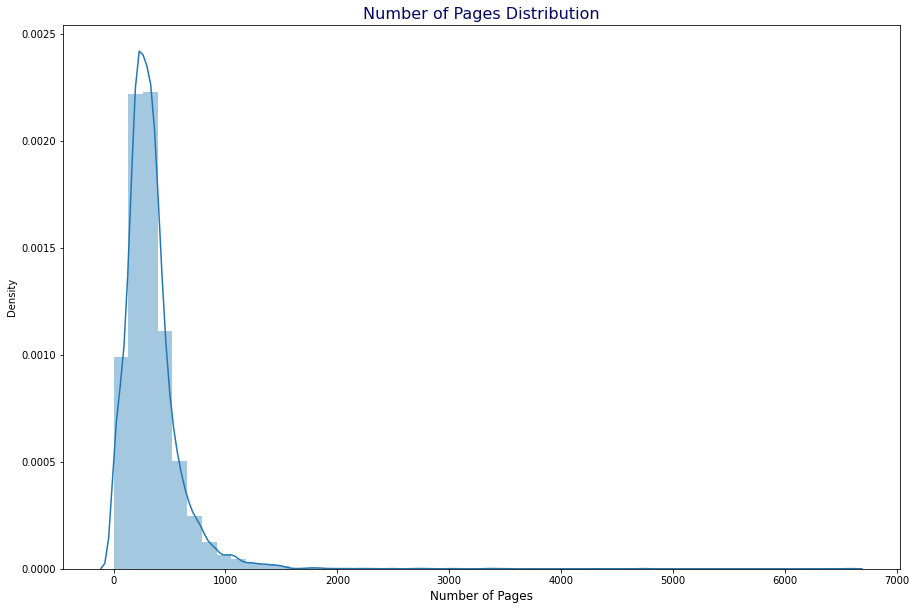

In [35]:
# Number of Pages Distribution
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['num_pages'],ax=ax)
ax.set_title("Number of Pages Distribution", fontsize=16, color='#030764')
ax.set_xlabel('Number of Pages',fontsize=12)

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Ratings Count')]

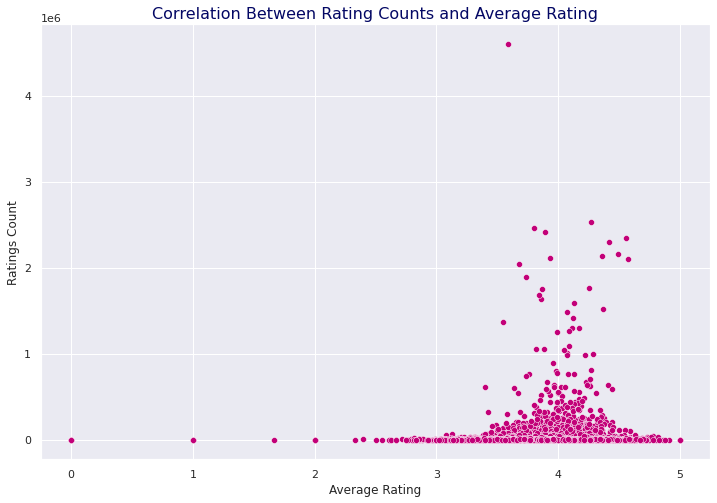

In [36]:
# Correlation Between Rating Counts and Average Rating
sns.set(rc = {'figure.figsize': (12, 8)})
ax = sns.scatterplot(data=df, x="average_rating", y="ratings_count", color="#c20078")
ax.set_title("Correlation Between Rating Counts and Average Rating", fontsize=16, color='#030764')
ax.set(xlabel='Average Rating', ylabel='Ratings Count')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Number of Pages')]

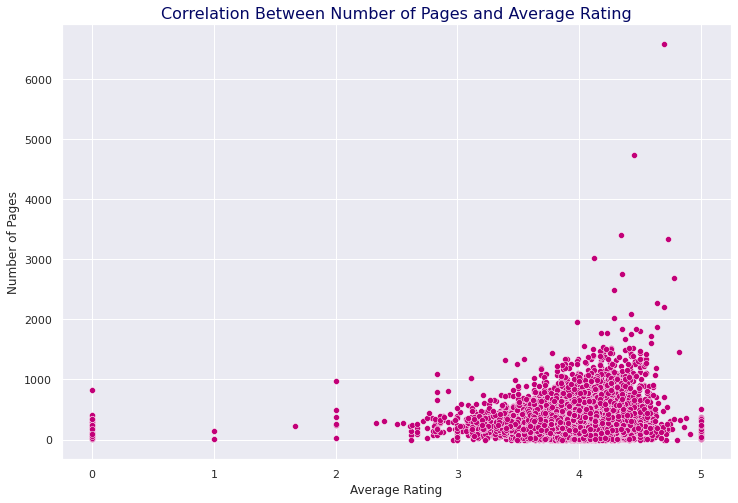

In [37]:
# Correlation Between Number of Pages and Average Rating
sns.set(rc = {'figure.figsize': (12, 8)})
ax = sns.scatterplot(data=df, x="average_rating", y="num_pages", color="#c20078")
ax.set_title("Correlation Between Number of Pages and Average Rating", fontsize=16, color='#030764')
ax.set(xlabel='Average Rating', ylabel='Number of Pages')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Languages')]

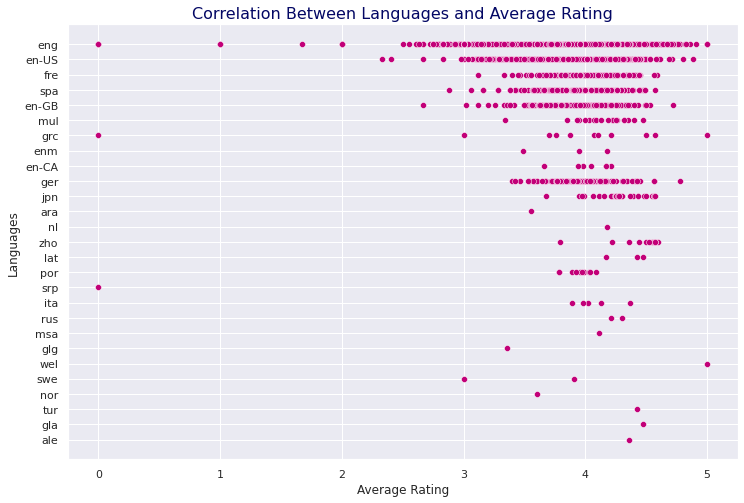

In [38]:
# Correlation Between Languages and Average Rating
sns.set(rc = {'figure.figsize': (12, 8)})
ax = sns.scatterplot(data=df, x="average_rating", y="language_code", color="#c20078")
ax.set_title("Correlation Between Languages and Average Rating", fontsize=16, color='#030764')
ax.set(xlabel='Average Rating', ylabel='Languages')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Text Reviews Count')]

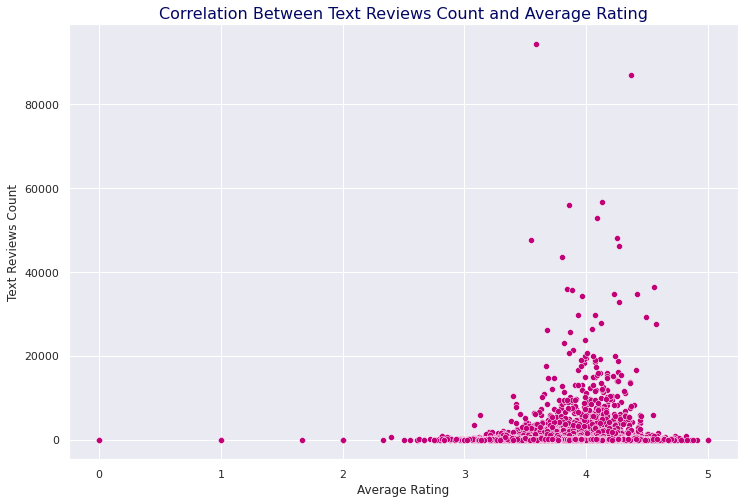

In [39]:
# Correlation Between Text Reviews Count and Average Rating
sns.set(rc = {'figure.figsize': (12, 8)})
ax = sns.scatterplot(data=df, x="average_rating", y="text_reviews_count", color="#c20078")
ax.set_title("Correlation Between Text Reviews Count and Average Rating", fontsize=16, color='#030764')
ax.set(xlabel='Average Rating', ylabel='Text Reviews Count')

<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px"><span style="font-size:20px; color:#960; font-weight:bold">5. Recommender Systems</span></div>

We will create a copy of our original data just to be safe so that we are safe in case we mess up something.

In [40]:
df2 = df.copy()

We will now create a new column called 'rating_between'. We will divide our average rating column into various categories such as rating between 0 and 1, 1 and 2 and so on. This will work as one of the features that we will feed to our model so that it can make better predictions.

In [41]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [42]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


We will now create two new data frames that contain the different values for the rating_between column we just made. We will assign the value 1 if a rating falls under a particular group lets say 4 and 5 and rest others will be given the value of 0. We will apply the same approach to divide the language code column to retrive these languages individually and give them the value of 1 and 0 as well where 1 will be assigned if the book is written in a particular language for example, English and 0 if it's not written in English.

In [43]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [44]:
language_df = pd.get_dummies(df2['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now concatenate these two data frames into one and name it features. This Data frame will be the features that we will feed to the mmodel. It will contain the values of rating_df and language_df and will also have the values of average rating and ratings count.

In [45]:
features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


Now that we have our features ready, we will now use the Min-Max scaler to scale these values down. It will help in reducing the bias for some of the books that have too many features. It will basically find the median for all and equalize it,

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

We have scaled down our features and now we will use KNN to create our Recommender system.

In [48]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

We fit all the features to our model and now we will have to create a custom method. When this method will be called, we will have to pass the name of the book in it. The model will try and find the books based on the features that we have passed in it. We will store these book names that the system recommends in a list and return it at the end.

In [49]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [50]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [51]:
BookNames = BookRecommender('The Lord of the Rings: Weapons and Warfare')
BookNames

['The Lord of the Rings: Weapons and Warfare',
 'Fullmetal Alchemist  Vol. 2 (Fullmetal Alchemist  #2)',
 "Carrie / 'Salem's Lot / The Shining",
 'The Valley of Vision: A Collection of Puritan Prayers and Devotions',
 'The Gettysburg Address',
 'The Return of the King (The Lord of the Rings  #3)']

With this we come to an end to our Recommender system. As we can see, our model is showing some pretty decent result. We passed in the name of one of the Harry potter books and our system quickly recommended us books based upon the average ratings. The books that we recieved have almost the same ratings and we have also recieved books such as the The Fellowhip of the Ring, which again is a fantasy based story line somewhat similar to the Harry Potter books. So we can say that our model is giving decent results. I would like to thank - Shivam Ralli whose notebook i referenced. It is a very well written kernel and everyone should have a look at it once.